# Data analysis of diabetes 
In this notebook, basic analysis of diabetes data (link) is covered.

In [20]:
# Importing the librariess
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
# Reading in the diabetes data
diabetes=pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# There are some values in data we want to remove (for example, skin thickness or insulin level cannot be 0!)

# Let's remove rows where glucose=0, blood pressure=0, skin thickness=0, insulin=0 or BMI=0
diabetes.drop(diabetes[diabetes['SkinThickness'] == 0].index, inplace = True)
diabetes.drop(diabetes[diabetes['BloodPressure'] == 0].index, inplace = True)
diabetes.drop(diabetes[diabetes['Insulin'] == 0].index, inplace = True)
diabetes.drop(diabetes[diabetes['BMI'] == 0].index, inplace = True)

# The shape of dataframe
print('After modifications, the number of rows is', diabetes.shape)

# The minimum values now are more reasonable
print(diabetes.min())

After modifications, the number of rows is (393, 9)
Pregnancies                  0.000
Glucose                      0.000
BloodPressure               24.000
SkinThickness                7.000
Insulin                     14.000
BMI                         18.200
DiabetesPedigreeFunction     0.085
Age                         21.000
Outcome                      0.000
dtype: float64


# Visualizing the data
Here we're doing some basic visualization for the diabetes dataset to find some interesting connections

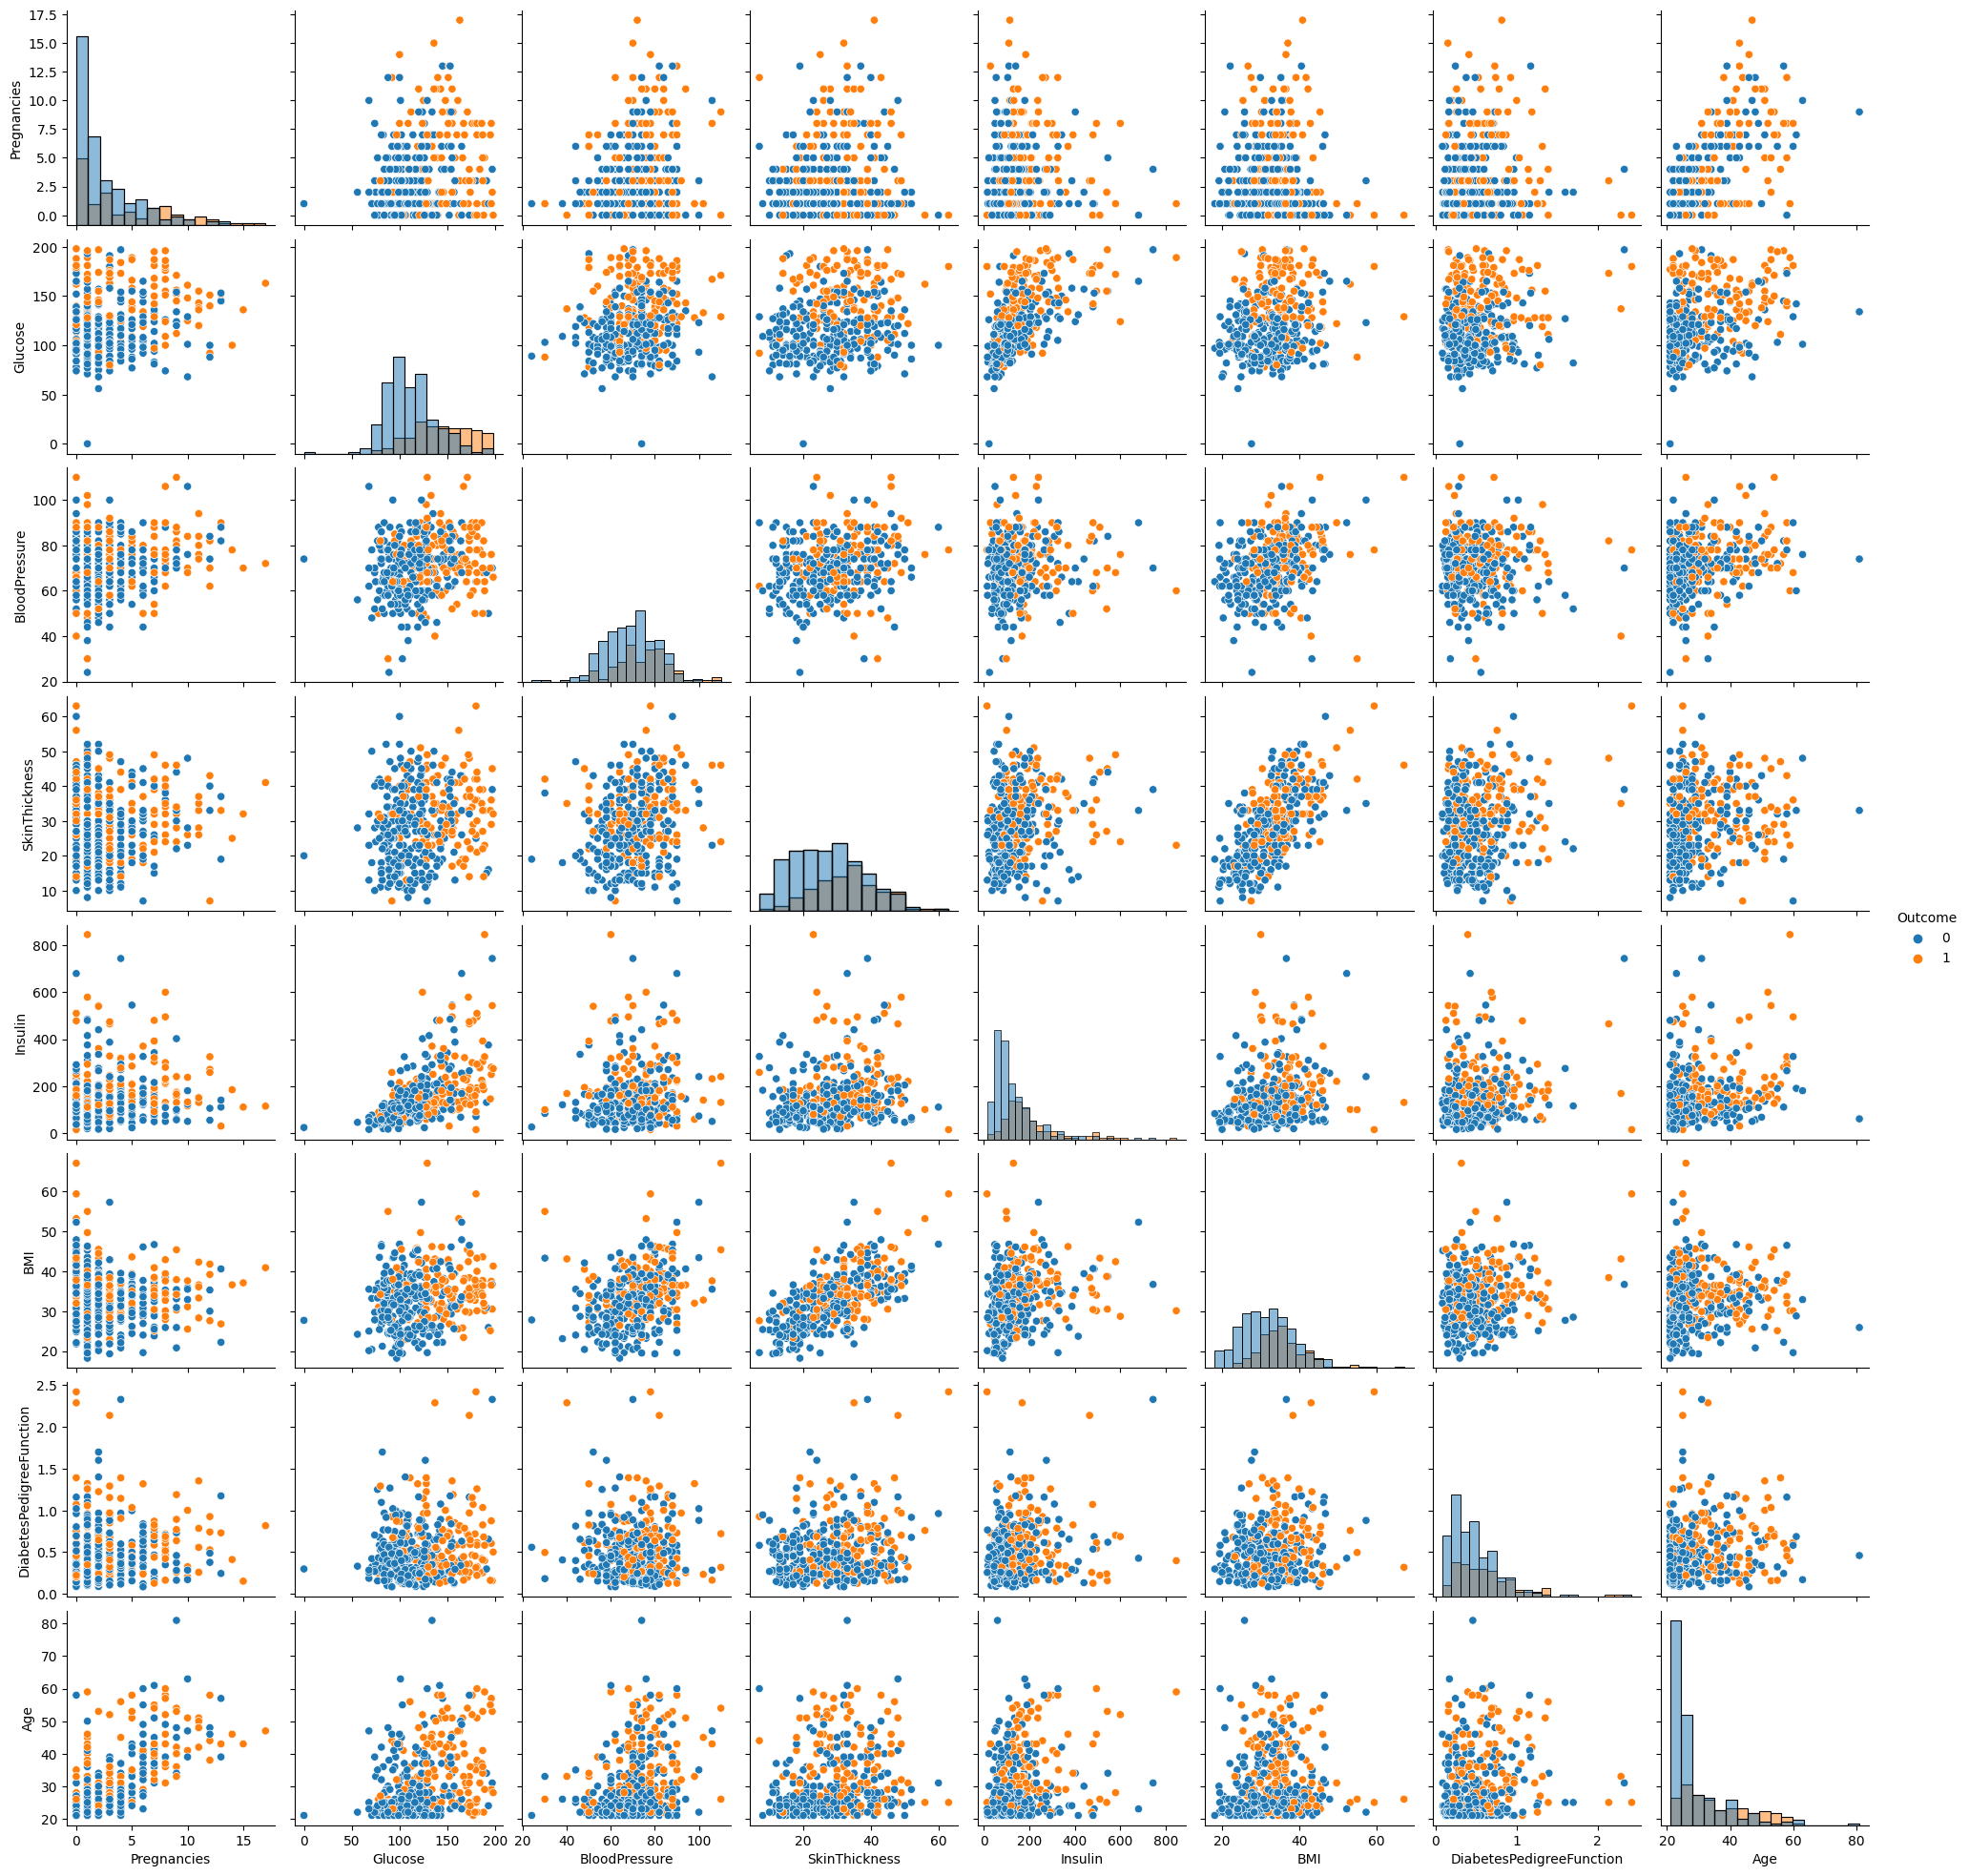

In [4]:
# Now we can draw new plots using the modified data
sns.pairplot(diabetes, hue='Outcome',diag_kind='hist')

<Axes: >

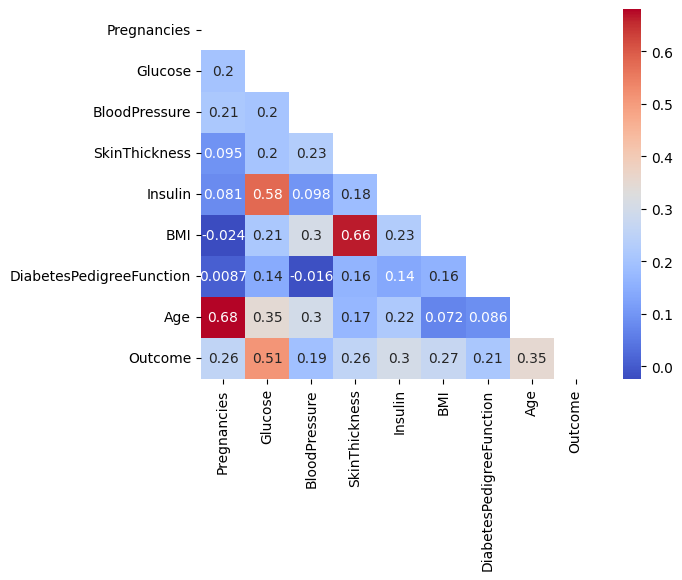

In [5]:
# Let's draw a heatmap

# correlations
c=diabetes.corr()

sns.heatmap(c,cmap = 'coolwarm', annot=True, mask=np.triu(np.ones_like(c, dtype=bool)))

There's a somewhat positive correlation with glucose and insulin levels. Let's study this a bit further

<Axes: xlabel='Glucose', ylabel='Insulin'>

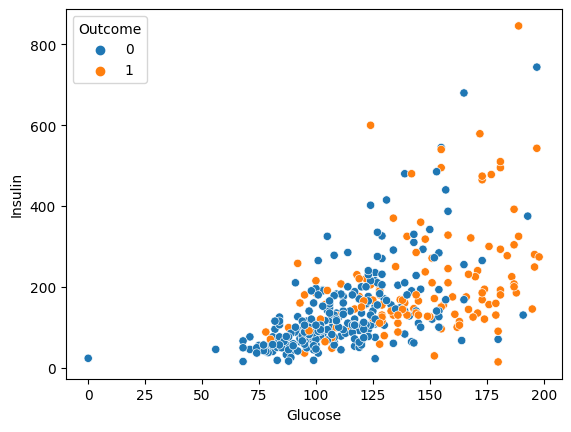

In [6]:
# Scatterplot
sns.scatterplot(data=diabetes,x='Glucose',y='Insulin',hue='Outcome')

<Axes: xlabel='Outcome', ylabel='Glucose'>

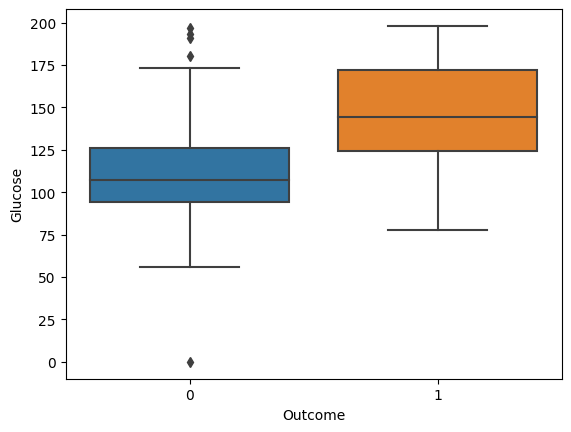

In [7]:
# Boxplot
sns.boxplot(data=diabetes,x='Outcome',y='Glucose')

<Axes: xlabel='Outcome', ylabel='Insulin'>

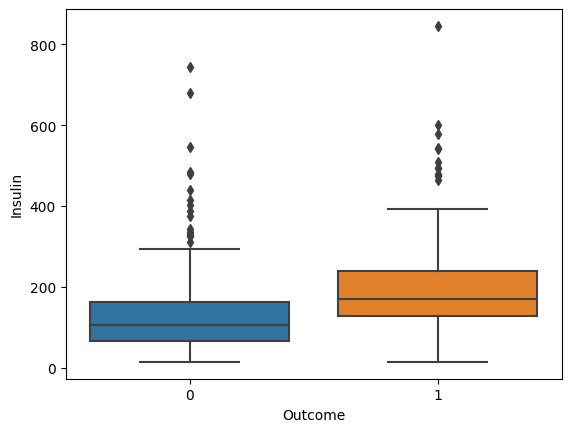

In [8]:
# Another boxplot
sns.boxplot(data=diabetes,x='Outcome',y='Insulin')

<Axes: xlabel='Age', ylabel='Density'>

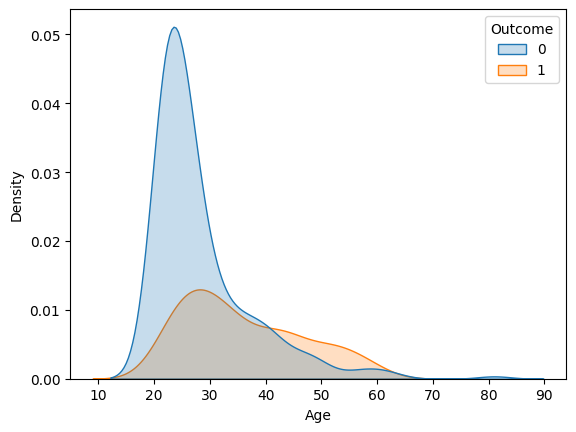

In [9]:
# Let's draw a kde plot with age
sns.kdeplot(data=diabetes,x='Age',hue='Outcome',fill=True)

<Axes: xlabel='Glucose', ylabel='Density'>

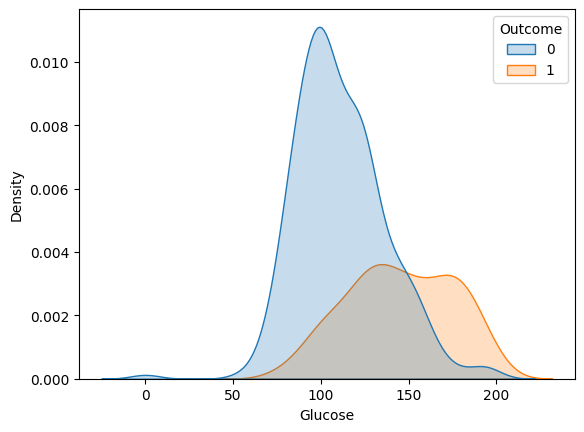

In [10]:
# A kde plot with glucose
sns.kdeplot(data=diabetes,x='Glucose',hue='Outcome',fill=True)

After this basic plotting analysis, we can start machine learning part for the data and do a PCA analysis

# Machine learning part in studying the dataset
Here we're applying some basic machine learning algorithms for the data

In [11]:
# Importing more libraries for machine learning
from sklearn import preprocessing
import plotly.graph_objs as go
from mpl_toolkits.mplot3d import Axes3D
import plotly.offline as offline

In [12]:
# Scaling the variables of data:
scaled = preprocessing.scale(diabetes)

# PCA
from sklearn.decomposition import PCA

pca=PCA(2) # Instantiating the PCA with 2 principal components

pca.fit(scaled) # Fitting the scaled data in PCA

X_tr = pca.transform(scaled) # Apply the dimensionality reduction on the data

In [13]:
# Let's see if the pca components are orthogonal
a=pca.components_[0]
b=pca.components_[1]

i=np.inner(a,b)

In [14]:
second_c=X_tr[:,1] # The second column

In [15]:
first_c=X_tr[:,0] # The first column

<Axes: >

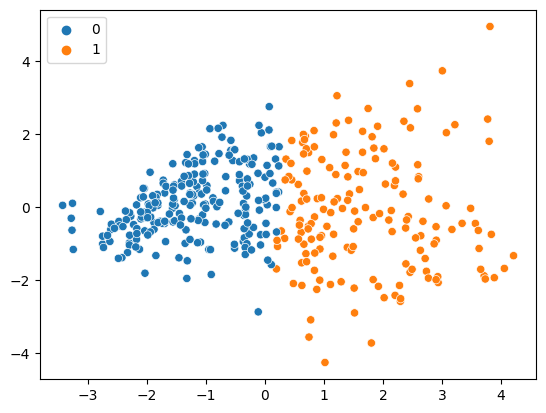

In [22]:
# K means
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2).fit(X_tr)

# Drawing as a scatterplot
sns.scatterplot(x=X_tr[:,0],y=X_tr[:,1],hue=kmeans.labels_)


# Tasks for another group 

Task 1. Is the data classificable? Can it be determined from the plotted PCA's?
Task 2. For now the data has been stripped from rows with empty values wich makes our classification less accurate due to losing data. Imputate the bloodpressure column to spare few rows. You may use for example linear regression.
Task 3. Determine the most accurate classification algoritm, and use it to predict diabetes.

Note. You may look at the Heart data processing notebook for tips. The above tasks have been done in the notebook for another dataset.